In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [6]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
df.left.unique()

array([1, 0], dtype=int64)

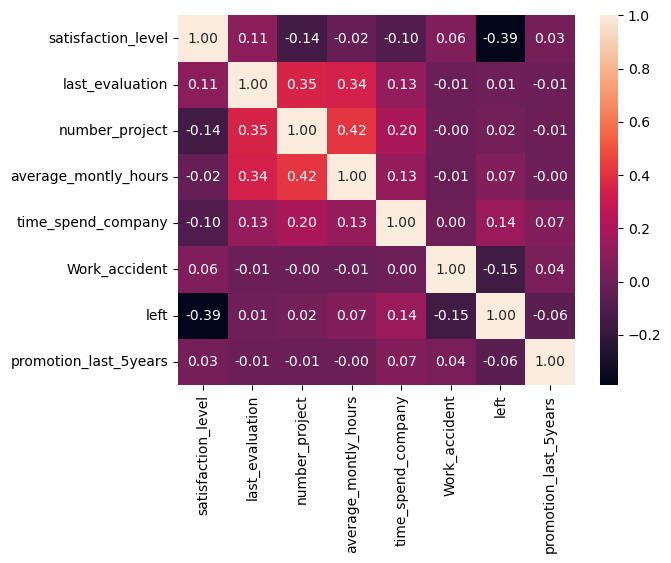

In [16]:

sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.xticks(rotation=90);

In [27]:
df.groupby(df.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


from above we can tell 
1. satisfaction level : the ones who left have 44 % satisfaction while 
    who stayed have 66% satisfaction 
2. average monthly hours : its higher for the leaving firm 

3. promotion last 5 years : employees who have given promotion are likely to be retained at firm 


In [35]:
val=pd.crosstab(df.salary,df.left)
val

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


#### crosstab function tutorial 
https://www.youtube.com/watch?v=I_kUj-MfYys&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=13&ab_channel=codebasics

<AxesSubplot:xlabel='left', ylabel='salary'>

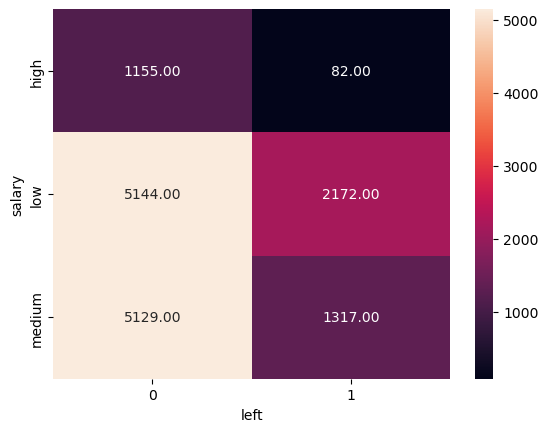

In [36]:
sns.heatmap(val,annot=True,fmt='.2f')

<AxesSubplot:xlabel='salary'>

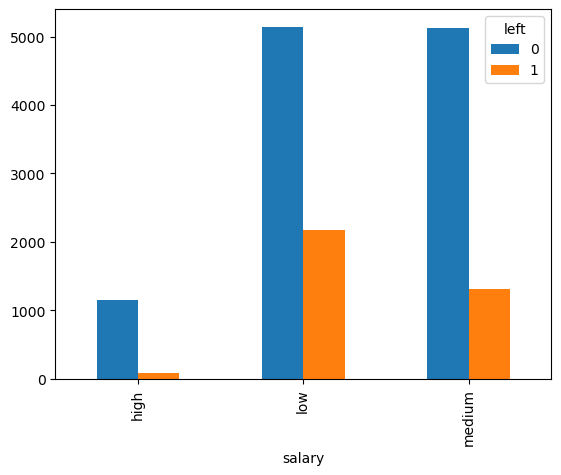

In [37]:
val.plot(kind='bar')

higher the salaries lesser the chance of leaving the company 

In [38]:
# creating the model 
df1=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [41]:
val=pd.get_dummies(df1.salary,drop_first=True)

In [50]:
mdf=pd.concat([df1,val],axis='columns')
mdf.drop('salary',axis=1,inplace=True)


In [51]:
y=df.left

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(mdf,y,test_size=0.23,random_state=3)

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [54]:
lr.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred=lr.predict(X_test)

In [56]:
lr.score(X_test,y_test)

0.776231884057971